In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'insert': [0.0, 0.1, 0.3, 0.5, 1.0],
    'mean': [0.009905, 0.45019, 0.376818, 0.801856, 0.643859],
    'quality': ['good', 'good', 'poor', 'good', 'poor'], 
    'std': [0.003662, 0.281895, 0.306806, 0.243288, 0.322378]
})
df

,insert,mean,quality,std
0,0.0,0.009905,good,0.003662
1,0.1,0.450190,good,0.281895
2,0.3,0.376818,poor,0.306806
3,0.5,0.801856,good,0.243288
4,1.0,0.643859,poor,0.322378


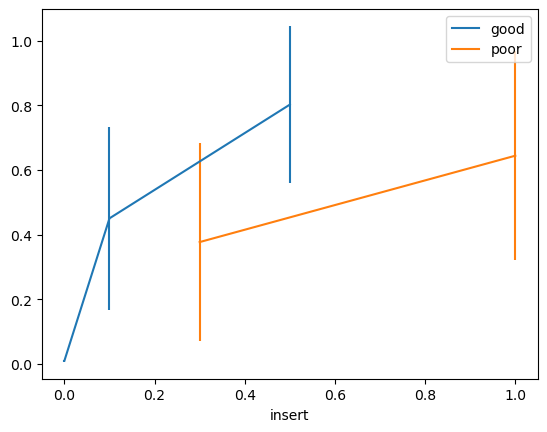

In [3]:
fig, ax = plt.subplots()
for key, group in df.groupby('quality'):
    group.plot('insert','mean', yerr = 'std', label=key, ax=ax)

<Axes: title={'center': 'Quality'}, ylabel='quality'>

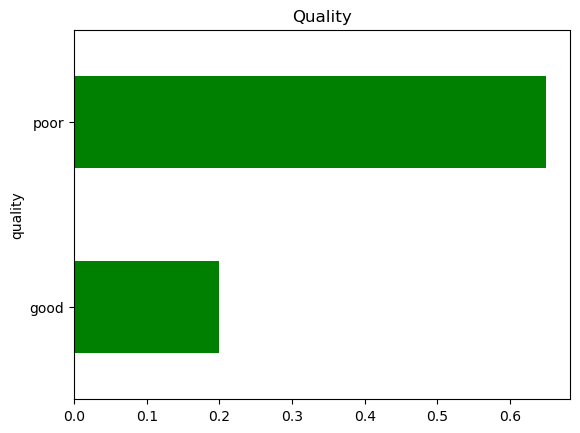

In [4]:
qual = df.groupby("quality").agg([np.mean, np.std])
qual = qual['insert']
qual.plot(kind = "barh", y='mean', title = "Quality", color='green', legend=False)

In [5]:
df = pd.read_csv('Toast.csv')
if 'type' not in df.columns:
    print('Not Found')
else:
    print('Found')

Found


In [17]:
if df['type'].isnull().any():
    print('Null Values Found')
else:
    print('No Null Values')
df.head()

No Null Values


,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,type
0,12/27/2015,1.33,64236.62,8696.87,8603.62,93.25,conventional
1,12/20/2015,1.35,54876.98,9505.56,9408.07,97.49,conventional
2,12/13/2015,0.93,118220.22,8145.35,8042.21,103.14,conventional
3,12/6/2015,1.08,78992.15,5811.16,5677.40,133.76,conventional
4,11/29/2015,1.28,51039.60,6183.95,5986.26,197.69,conventional


In [11]:
df_prices = df.groupby("type").agg({'AveragePrice': [np.mean, np.std],
                                    'Total Volume': [np.mean, np.std],
                                    'Total Bags': [np.mean, np.std],
                                    'Small Bags': [np.mean, np.std],
                                    'Large Bags': [np.mean, np.std]})
prices = df_prices['AveragePrice']
prices.head()

,mean,std
type,,
conventional,1.110,0.152733
organic,1.679,0.367649


<Axes: title={'center': 'Average Prices'}, ylabel='type'>

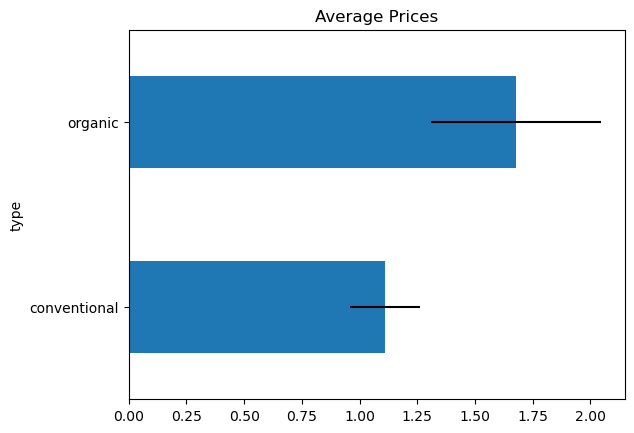

In [10]:
prices.plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices", xerr = "std")